In [1]:
################################ Structural Similarity Index Measure #####################
import warnings
warnings.filterwarnings('ignore')

from skimage.measure import compare_ssim
import imutils
import cv2
import matplotlib.pyplot as plt

src='frames'

# load the two input images
imageA = cv2.imread(src+'/160.tif')
imageB = cv2.imread(src+'/170.tif')
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.7392112122121934


In [2]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
#cv2.imshow("Original", imageA)
#cv2.imshow("Modified", imageB)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

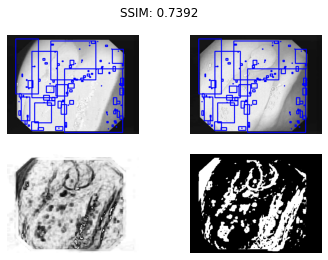

In [3]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

# setup the figure
fig = plt.figure("SSIM")
plt.suptitle("SSIM: %.4f" % (score))

# show first image
ax = fig.add_subplot(2, 2, 1)
plt.imshow(imageA, cmap = plt.cm.gray)
plt.axis("off")

# show the second image
ax = fig.add_subplot(2, 2, 2)
plt.imshow(imageB, cmap = plt.cm.gray)
plt.axis("off")

# show first image
ax = fig.add_subplot(2, 2, 3)
plt.imshow(diff, cmap = plt.cm.gray)
plt.axis("off")

# show the second image
ax = fig.add_subplot(2, 2, 4)
plt.imshow(thresh, cmap = plt.cm.gray)
plt.axis("off")

plt.show()